### 1 - import librarys

In [29]:
import numpy as np
import pandas as pd
import csv
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from joblib import load
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from joblib import dump

### 2 - set option pour l'affichage

In [2]:
pd.set_option("max_columns", None)
pd.set_option("max_colwidth", None)
pd.set_option("max_row", 500)

### 3 - Chargement des fichiers et découverte des données

In [3]:
pd.read_csv('X_train.csv')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
1,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
2,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
3,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
4,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...
16507,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
16508,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
16509,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
16510,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [4]:
df_X_train = pd.read_csv('X_train.csv')
df_y_train = pd.read_csv('y_train.csv')

In [5]:
df_X_train.head(1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03


In [6]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

### 4 - trouver le best hyperparamètre avec grid search et entrainement avec RandomForestRegressor

In [7]:
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Hyperparamètres à expliquer:
- n_estimators : nombre d'arbres
- criterion : 
- max_depth : profondeur max d'un arbre
- max_features : nombre max de feature à vérifier pour faire un split dans un arbre(ressemble random subspace)
- bootstrap : utilistaion ou non de bootstrap
- oob_score ; utilisation ou non du oob_score(dispo qu'avec bootstrap)
- n_jobs : nombre de process fait en parallèle
- random_state : contrôle l'aléatoire du bootstrapping et des features choisi par le max_feature
- warn_start : réutilisation d'une autre forêt
- max_samples : 

In [8]:
# Number of trees in random forest
n_estimators = [1000]
# Number of features to consider at every split
max_features = ['log2']
# Maximum number of levels in tree
max_depth = [20,25]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Trueに設定すると、前回のフィットの呼び出しの解を再利用し、アンサンブルにさらに推定量を追加します
warm_start = [True]
# Whether to use out-of-bag samples to estimate the generalization score. Only available if bootstrap=True.
oob_score = [True]
#criterion = ['mse']
max_samples =[0.9]



hyper_parameters_grid = [
            {'max_depth': max_depth,
             'n_estimators': n_estimators,
             'max_features': max_features,
             #'bootstrap': bootstrap,
             'warm_start': warm_start,
             'oob_score': oob_score,
             #'criterion': criterion,
             'max_samples': max_samples,
             'random_state': [42]}
]

forest_reg_5 = RandomForestRegressor()

forest_grid_search_5 = GridSearchCV(
    estimator = forest_reg_5, 
    param_grid = hyper_parameters_grid, 
    cv=5, 
    return_train_score=True,
    verbose=2)

forest_grid_search_5.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\Users\utilisateur\anaconda3\envs\simplon\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[CV] END max_depth=20, max_features=log2, max_samples=0.9, n_estimators=1000, oob_score=True, random_state=42, warm_start=True; total time= 1.7min


C:\Users\utilisateur\anaconda3\envs\simplon\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[CV] END max_depth=20, max_features=log2, max_samples=0.9, n_estimators=1000, oob_score=True, random_state=42, warm_start=True; total time= 1.6min


C:\Users\utilisateur\anaconda3\envs\simplon\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[CV] END max_depth=20, max_features=log2, max_samples=0.9, n_estimators=1000, oob_score=True, random_state=42, warm_start=True; total time= 1.6min


C:\Users\utilisateur\anaconda3\envs\simplon\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[CV] END max_depth=20, max_features=log2, max_samples=0.9, n_estimators=1000, oob_score=True, random_state=42, warm_start=True; total time= 1.6min


C:\Users\utilisateur\anaconda3\envs\simplon\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[CV] END max_depth=20, max_features=log2, max_samples=0.9, n_estimators=1000, oob_score=True, random_state=42, warm_start=True; total time= 1.6min


C:\Users\utilisateur\anaconda3\envs\simplon\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[CV] END max_depth=25, max_features=log2, max_samples=0.9, n_estimators=1000, oob_score=True, random_state=42, warm_start=True; total time= 1.7min


C:\Users\utilisateur\anaconda3\envs\simplon\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[CV] END max_depth=25, max_features=log2, max_samples=0.9, n_estimators=1000, oob_score=True, random_state=42, warm_start=True; total time= 2.1min


C:\Users\utilisateur\anaconda3\envs\simplon\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[CV] END max_depth=25, max_features=log2, max_samples=0.9, n_estimators=1000, oob_score=True, random_state=42, warm_start=True; total time= 2.3min


C:\Users\utilisateur\anaconda3\envs\simplon\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[CV] END max_depth=25, max_features=log2, max_samples=0.9, n_estimators=1000, oob_score=True, random_state=42, warm_start=True; total time= 2.0min


C:\Users\utilisateur\anaconda3\envs\simplon\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[CV] END max_depth=25, max_features=log2, max_samples=0.9, n_estimators=1000, oob_score=True, random_state=42, warm_start=True; total time= 1.9min


C:\Users\utilisateur\anaconda3\envs\simplon\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [20, 25], 'max_features': ['log2'],
                          'max_samples': [0.9], 'n_estimators': [1000],
                          'oob_score': [True], 'random_state': [42],
                          'warm_start': [True]}],
             return_train_score=True, verbose=2)

### 5 - visualisation de resultat de grid search

In [9]:
results=pd.DataFrame(forest_grid_search_5.cv_results_)
results.T

,0,1
mean_fit_time,93.698774,118.147694
std_fit_time,2.16885,12.224962
mean_score_time,2.316937,2.737287
std_score_time,0.118804,0.423833
param_max_depth,20,25
param_max_features,log2,log2
param_max_samples,0.9,0.9
param_n_estimators,1000,1000
param_oob_score,True,True
param_random_state,42,42


### 6 - sélection de hyperparametres

In [10]:
# to see the best hyperparameters
forest_grid_search_5.best_params_

{'max_depth': 25,
 'max_features': 'log2',
 'max_samples': 0.9,
 'n_estimators': 1000,
 'oob_score': True,
 'random_state': 42,
 'warm_start': True}

### 7 - sélection de best modèle

In [11]:
forest_best_model_5 = forest_grid_search_5.best_estimator_

### 8 - save the best modèle

In [51]:
filename = 'model_rf.joblib'
joblib.dump(forest_best_model_5,filename)

['model_rf.joblib']

### 9 - performance

In [29]:
#pred_train = forest_best_model_5.predict(X_train)
#r2_score(y_train, pred_train)

0.9686666427373958

In [31]:
# 平均二乗誤差（MSE：Mean Squared Error）とは、各データに対して「予測値と正解値の差（＝誤差）」の二乗値を計算し、
# その総和をデータ数で割った値（＝平均値）を出力する関数
forest_mse = mean_squared_error(y_train, pred_train)
forest_rmse = np.sqrt(forest_mse)
print('MSE :',forest_mse)
print('RMSE :',forest_rmse)
print('error moyenne de prix est ',forest_rmse*100000, 'USD')

error moyenne de prix est  48960.3389462084 USD


In [13]:
# to see the best validation score
forest_grid_search_5.best_score_

0.8180797269450485

In [14]:
y_predict_rf = forest_best_model_5.predict(X_train)

In [18]:
#y_predict_rf = forest_best_model_5.predict(X_train)
rmse = mean_squared_error(y_train, y_predict_rf, squared=False)
#r2 = round(rf_cls.score(X, y),2)
r2 = forest_best_model_5.score(X_train, y_train)
print("La performance du modèle pour le jeu d'entrainement")
print("--------------------------------------")
#print(f'La RMSE est {round(rmse,2)}')
#print(f'Le score R2 est {round(r2,2)}')
print(f'Le score R2 est {r2}')
print(f'La RMSE est {rmse}')

print(f'error moyenne de prix est {rmse*100000} USD')

La performance du modèle pour le jeu d'entrainement
--------------------------------------
Le score R2 est 0.9707241069934146
La RMSE est 0.19782663092182973
error moyenne de prix est 19782.66309218297 USD


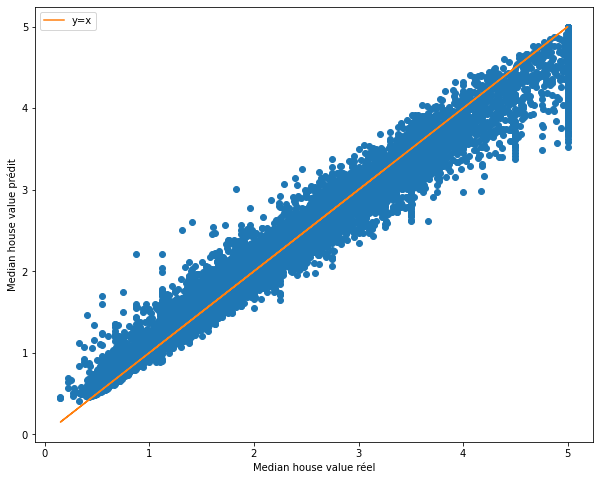

In [23]:
plt.figure(figsize=(10,8))
plt.plot(y_train,y_predict_rf,'o')
plt.plot(y_train,y_train,label='y=x')
plt.xlabel('Median house value réel')
plt.ylabel('Median house value prédit')
plt.legend()
plt.show()

### model linear regression

In [47]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)
dump(linreg,'linreg.joblib')

['linreg.joblib']

In [48]:
y_predict=linreg.predict(X_train)

In [49]:
rmse=mean_squared_error(y_train, y_predict, squared=False)
r2=round(linreg.score(X_train, y_train),2)

print("La performance du modèle pour le jeu d'entrainement")
print("--------------------------------------")
print(f'La RMSE est {round(rmse,2)}')
print(f'Le score R2 est {round(r2,2)}')
print(f'error moyenne de prix est {rmse*100000} USD')

La performance du modèle pour le jeu d'entrainement
--------------------------------------
La RMSE est 0.72
Le score R2 est 0.61
error moyenne de prix est 71967.57085831575 USD


In [43]:
y_test.shape, y_predict.shape

((4128, 1), (4128, 1))

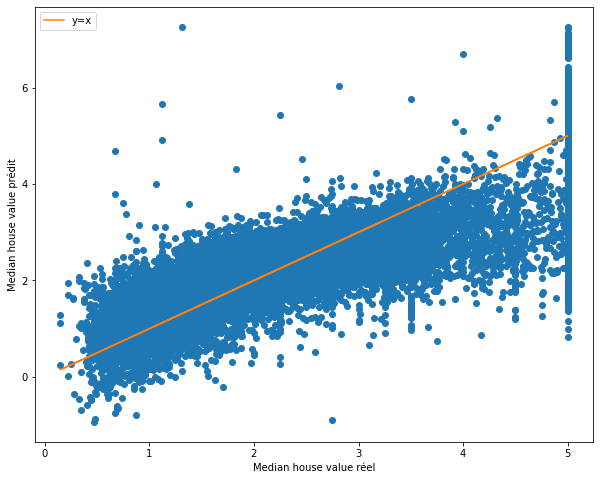

In [50]:
plt.figure(figsize=(10,8))
plt.plot(y_train,y_predict,'o')
plt.plot(y_train,y_train,label='y=x')
plt.xlabel('Median house value réel')
plt.ylabel('Median house value prédit')
plt.legend()
plt.show()